# April 10th, Wednesday
## Practical Session IV - Part 3


## 0. Setup the environment and load your data

In [1]:
# Install scanpy and loompy if you don't have them already or if you are running on colab
# In this notebook we will use the Louvain and Leiden clustering algorithms; you will need the corresponding packages
! pip install scanpy loompy louvain leidenalg > _

In [2]:
# Load the libraries we will use
import numpy as np
import pandas as pd
import scanpy as sc
import loompy
import matplotlib.pyplot as plt

In [3]:
# Adjust the output for the figures
sc.settings.verbosity = 3 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=100, facecolor='white')
plt.rcParams['figure.figsize'] = (6, 6)
plt.rcParams['font.size'] = 16
sc.logging.print_header()

scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.0 pandas==1.5.3 scikit-learn==1.2.1 statsmodels==0.13.5 python-igraph==0.10.8 louvain==0.8.1 pynndescent==0.5.10


In [4]:
!wget https://figshare.com/ndownloader/files/44904205 -O Data1_DimRed.h5ad

/bin/bash: wget: command not found


In [5]:
adata = sc.read_h5ad("Data1_DimRed.h5ad") # enter loom/h5ad file name here
#adata = sc.read_loom("Data1_DimRed.loom", var_names='var_names', obs_names='obs_names')


In [6]:
# Some scanpy versions might be asking for this
adata.uns['log1p']['base']=None

In [7]:
# If you used .loom format, you have to rerun the neighbors calculation
#sc.pp.neighbors(adata, n_neighbors=15, n_pcs=40) # specify the number of neighbors and number of PCs you wish to use

## 6. Clustering

Clustering the data helps to identify cells with similar gene expression properties that may belong to the same cell type or cell state. There are two popular clustering methods, both available in scanpy: Louvain and Leiden clustering.

### **Exercise 1**:

Run both the Louvain and Leiden clustering algorithms. Visualize both sets of clusters on your UMAP representation. Are the clusters different from each method? Visualize the clusters again, this time on the tSNE embedding instead of the UMAP embedding. Are there differences in which clusters are grouped together?

In [8]:
# your code here
sc.tl.louvain(adata, resolution=0.2)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 11 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


In [9]:
# your code here
sc.tl.leiden(adata, resolution=0.2)

running Leiden clustering
    finished: found 12 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


Next, you can visualize your UMAP and tSNE representations of the scRNA-seq and color by various metadata attributes (including Louvian or Leiden clusters) from the prior steps. For example:

/Users/lgarma/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


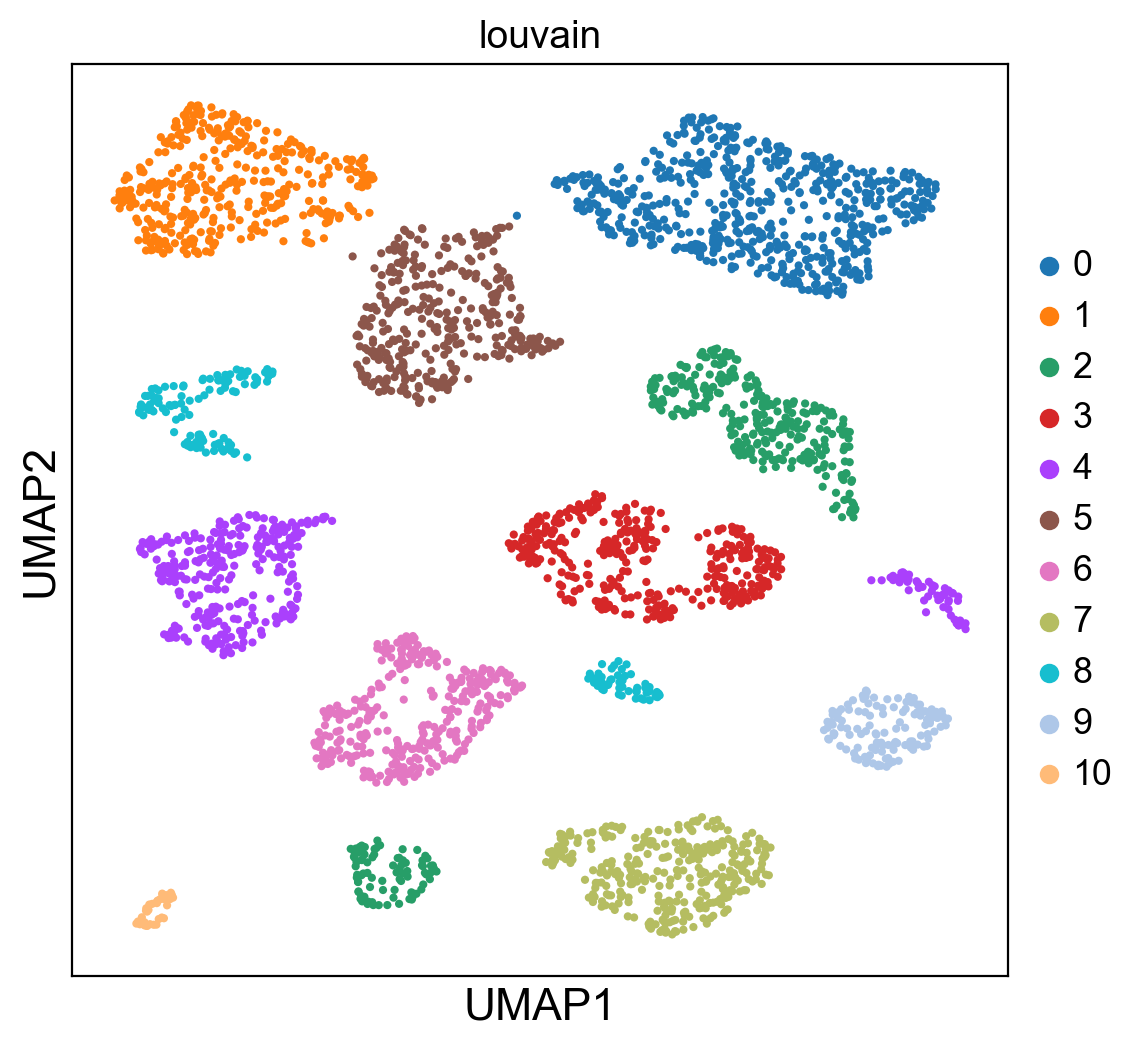

In [10]:
sc.pl.umap(adata, use_raw=False, color='louvain', wspace=0.3, ncols=2) # color by louvain and leiden

/Users/lgarma/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


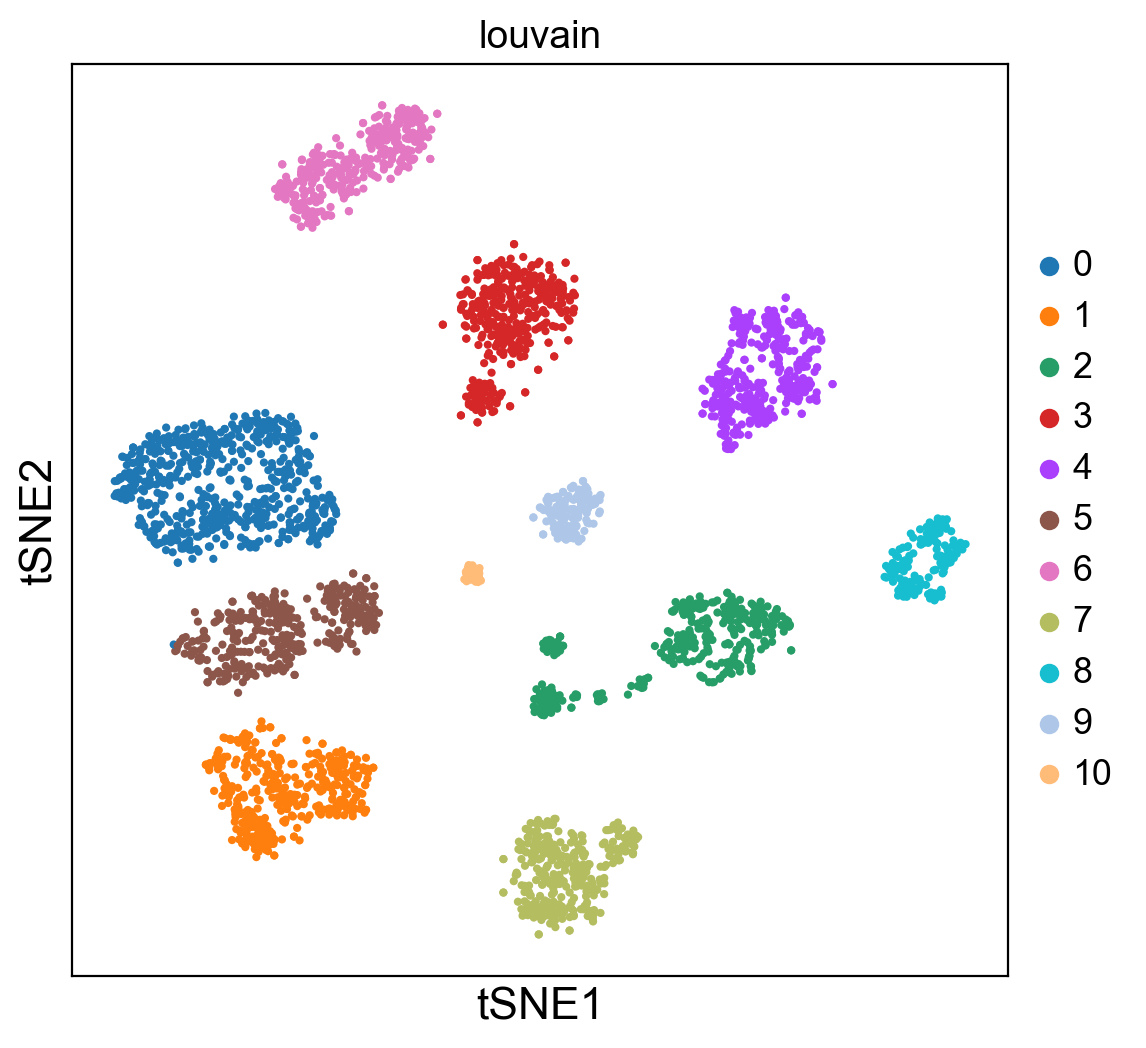

In [11]:
sc.pl.tsne(adata, use_raw=False, color='louvain', wspace=0.3, ncols=2) # color by louvain and leiden

### **Exercise 2**:

How many cells do you have per cluster? Assess this using the value_counts() function from pandas.

Hint: remember that adata.obs is *just* a pandas data frame!

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html

In [12]:
# your code here
adata.obs.louvain.value_counts()

0     623
1     386
2     385
3     372
4     356
5     347
6     322
7     316
8     167
9     128
10     37
Name: louvain, dtype: int64

### **Exercise 3**:

Visualize some of the other metadata on the UMAP or tSNE embedding, including the n_counts, n_genes, percent_mito, and phase metadata found in adata.obs. Do any clusters seem to have an obvious bias towards particular attributes?

This might be a sign that we want to optimize prior steps of the analysis, such as adjusting the number of principal components used in the neighborhood smoothing or regressing out particular variables. As with a pandas dataframe, you can also examine the frequency of various attributes using a command such as: adata.obs["phase"].value_counts().


/Users/lgarma/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/lgarma/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


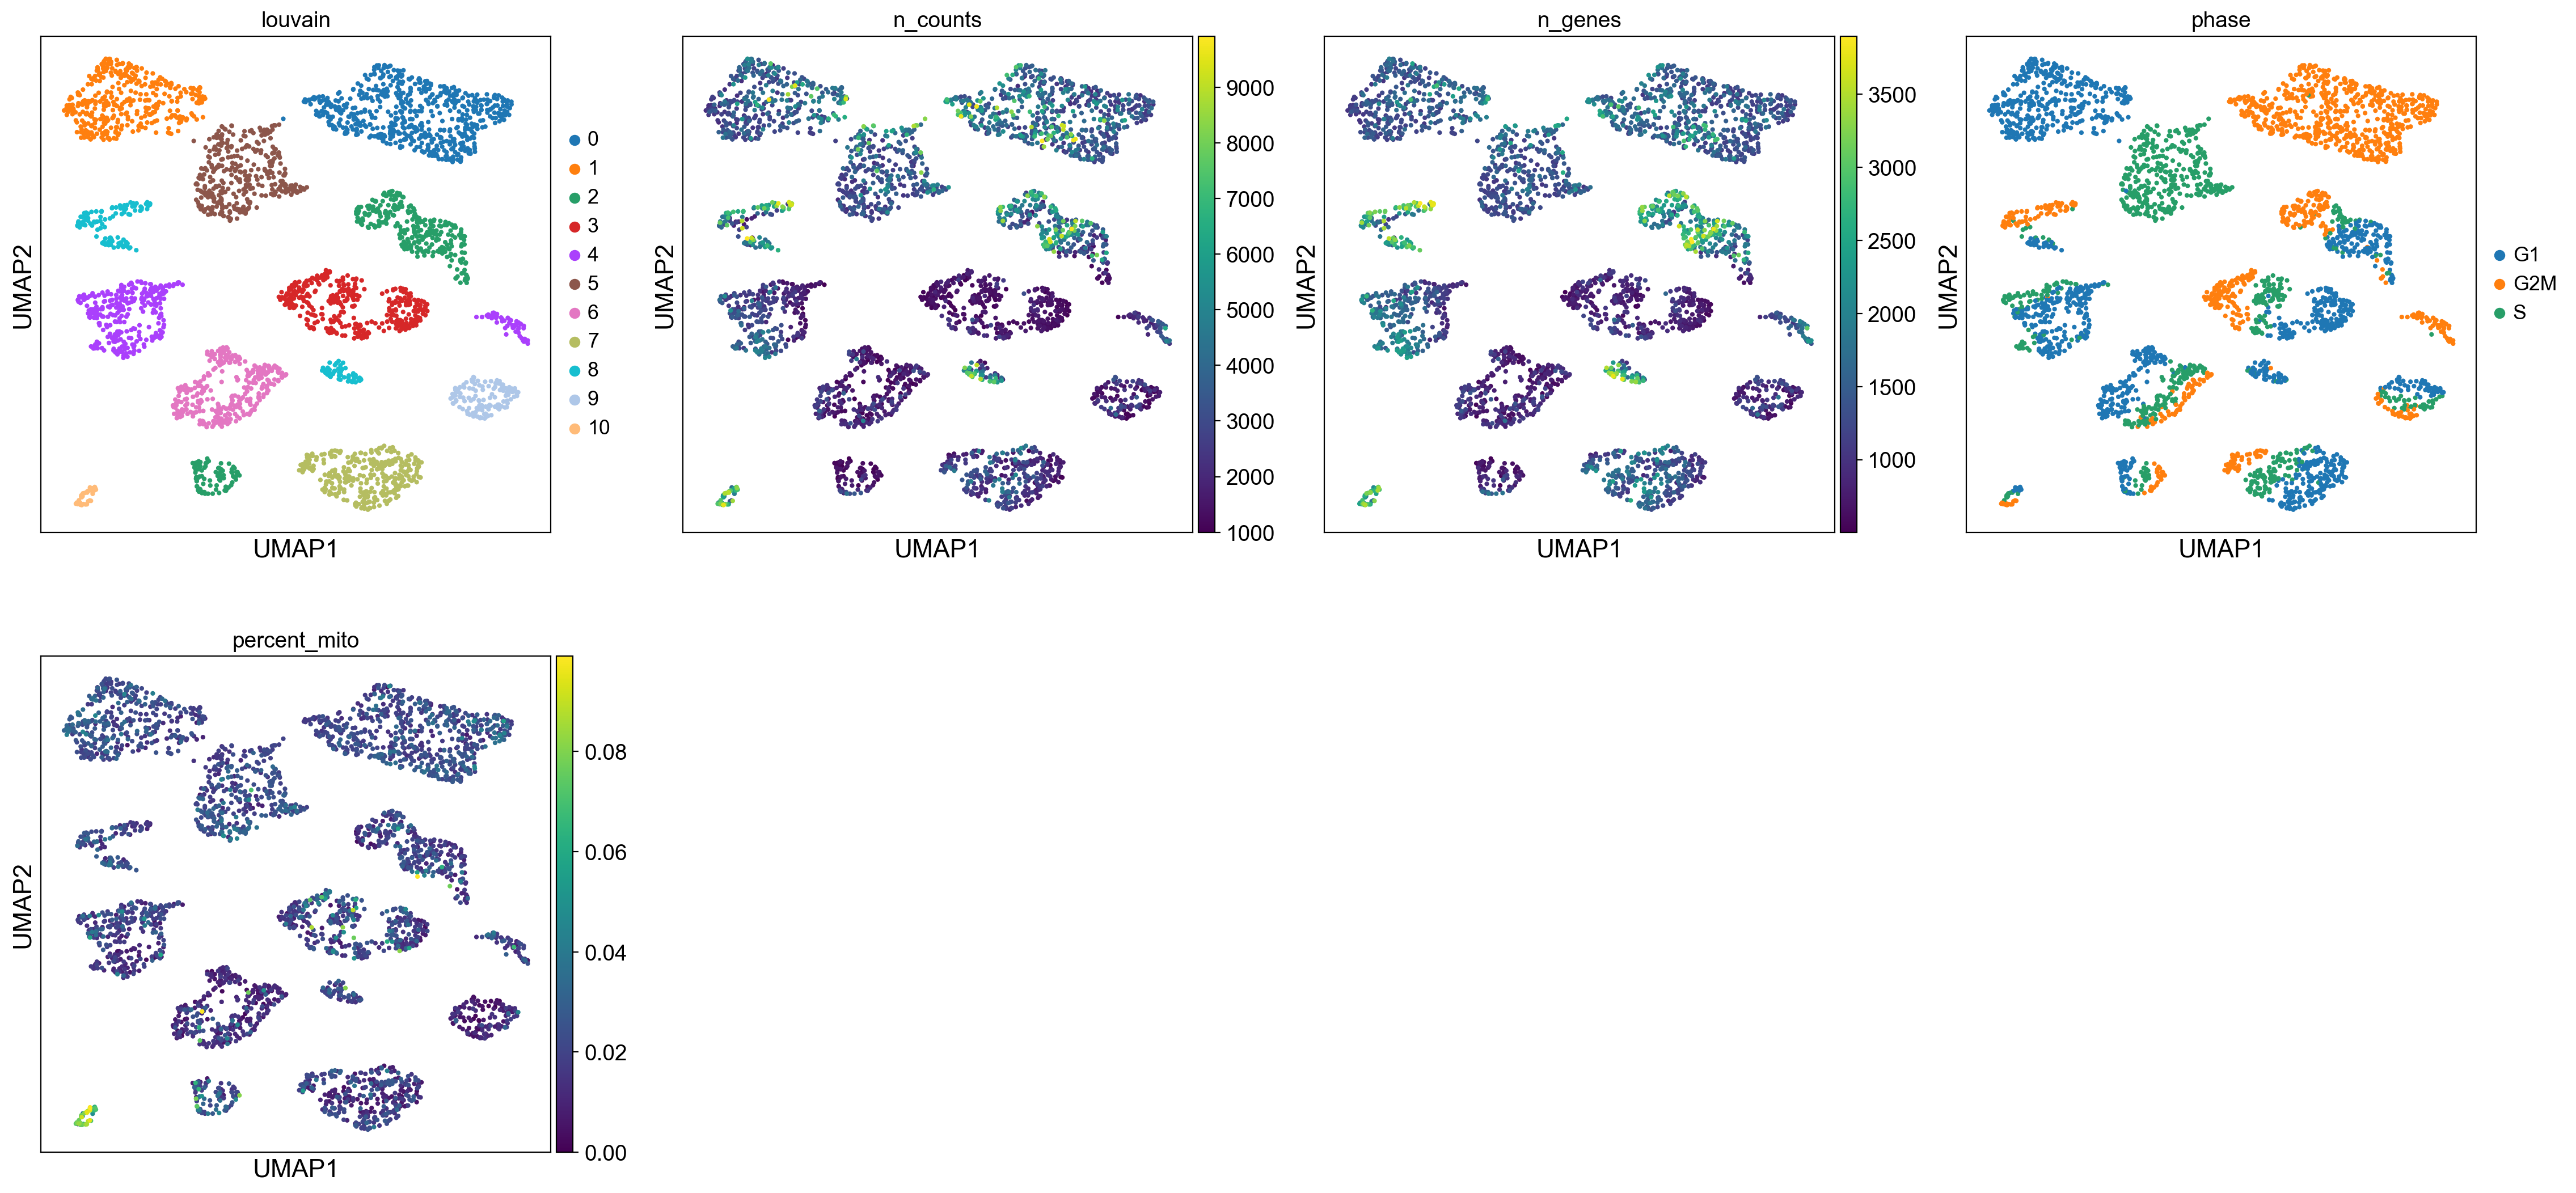

In [13]:
# your code here
sc.pl.umap(adata, color=['louvain','n_counts','n_genes','phase','percent_mito'])

### **Exercise 4**:

Let’s proceed with Louvain clustering and UMAP embeddings for the time being.
- Create a new metadata attribute for your current clusters, i.e. adata.obs["louvain_res1"] = adata.obs["louvain"].
- Repeat louvain clustering using different values for the resolution parameter: 0.5 and 1.5.
- Save the clusters in a new metadata column and visualize them on the UMAP representation.
- How does the number of clusters change with adjustments to the resolution parameter? Using the resolution=1 as a basis, do any clusters divide into two smaller clusters upon changing the resolution parameter? Do any clusters merge together?

In [14]:
adata.obs["louvain_res1"] = adata.obs["louvain"].copy()

sc.tl.louvain(adata, resolution=0.5) # you must complete
adata.obs["louvain_res0.5"] = adata.obs["louvain"].copy()

# repeat for louvain resolution1.5

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 12 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


/Users/lgarma/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/lgarma/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


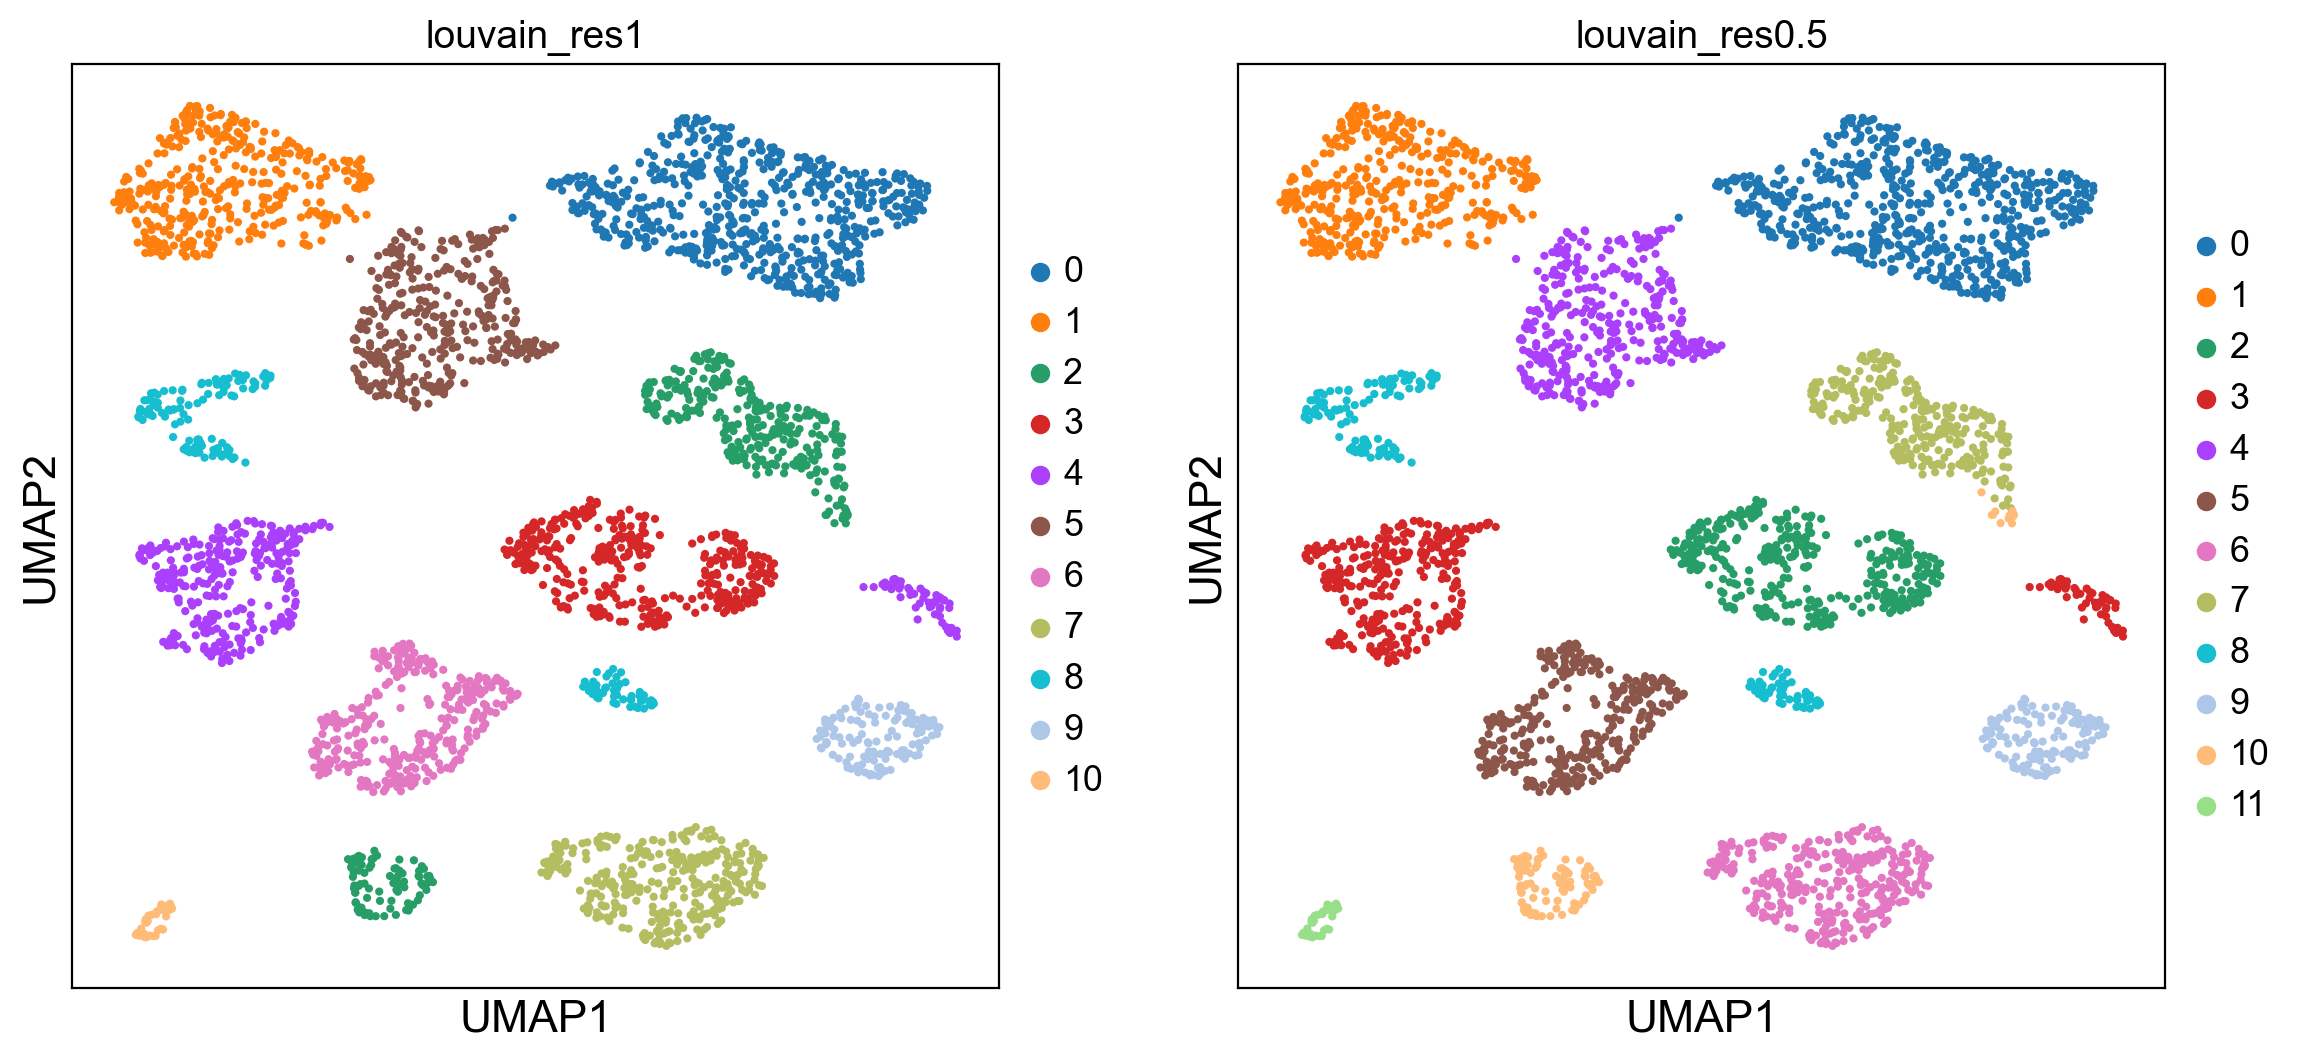

In [15]:
# visualize the umap colored by the different resolution clustering. What changes?
# your code here
sc.pl.umap(adata, color=['louvain_res1','louvain_res0.5'])

### **Exercise 5**:

Let’s take a few steps back to understand the previous steps a little bit better! For example, the number of principal components used in computing the neighborhood graph will greatly impact the visualizations.

Rerun previous code using the following number of PCs and visualize the different UMAPs and number of clusters: 4 PCs, 8 PCs, 15 PCs, 30 PCs. What changes with the different number of PCs used?

Choose an “optimal” number of PCs by examining the contribution of each PC to the total variance with the command: sc.pl.pca_variance_ratio(adata, log=True).

/Users/lgarma/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


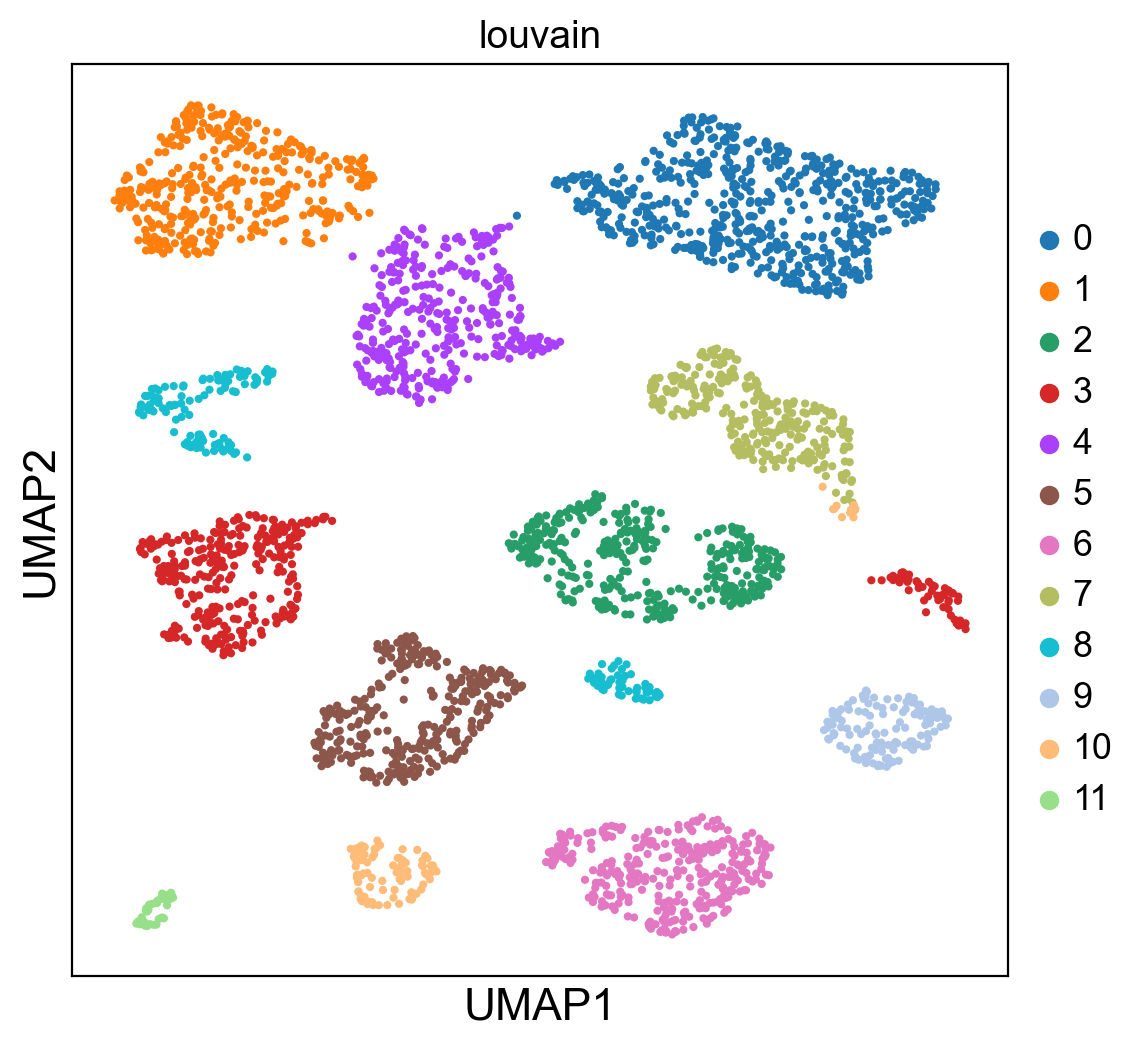

In [16]:
# Apply for 4 PCs
sc.pp.neighbors # you must complete
sc.tl.umap # you must complete
sc.tl.louvain # you must complete
sc.pl.umap(adata, color=["louvain"])

In [17]:
# Apply for 8 PCs

In [18]:
# Apply for 15 PCs

In [19]:
# Apply for 30 PCs

## 7. Identifying marker genes and cell types

Let’s use a simple method implemented by scanpy to find marker genes by the Louvain cluster.

In [20]:
sc.tl.rank_genes_groups(adata, groupby='louvain') # read the function description to complete this function

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


In [21]:
marker_genes = pd.DataFrame(adata.uns["rank_genes_groups"]["names"])

In [22]:
marker_genes.head(10)

0       1        2        3      4        5        6         7  \
0    Plp1   Cryab   Atp1a2   Arpp21  Cryab     Cst3    Cplx2    Snhg11   
1    Fth1    Plp1    Aldoc  Ppp1r1b   Plp1     C1qa   Ppp3ca      Meg3   
2  Tubb4a     Cnp  Gpr37l1   Pcp4l1    Cnp     Hexb    Olfm1     Ube3a   
3     Mbp     Mal  Slc6a11     Gnal  Sept4     Ctss     Snca     Snrpn   
4      Qk  Tubb4a      Mt1  Tmem158    Mal   P2ry12  Ppp1r1a    Dynll2   
5     Cnp   Sept4    Htra1   Baiap2    Mog     C1qc     Rpl3      Ttc3   
6   Cryab   Aplp1    Ntsr2   Ppp3ca    Mbp     Lgmn  Rasl10a      Sncb   
7    Mobp    Mobp   Atp1b2   Pde10a   Fth1   Selplg     Pkig    Chd3os   
8    Ermn   Josd2  Sparcl1  Chchd10  Aplp1  Tmem119   Zbtb20     Zwint   
9    Fa2h  Tspan2     Bcan    Kcnk2   Mobp    Itm2b   Camk2a  Atp6v1g2   

         8       9       10       11  
0   Tcf7l2    Ftl1    Cox8a  mt-Atp6  
1    Ntng1  Fcer1g  Neurod1   mt-Co1  
2    Ywhag  Tyrobp    Nrxn3   mt-Co2  
3    Ndrg4     Pf4     Nrep    Atp5l  
4  Atp6v1a    Apoe    Cbln3  Rpl22l1  
5   Atp1b1    C1qa     Zic1     Oaz1  
6     Meg3    C1qc     Selm   Rpl35a  
7     Ttc3    Cyba    H3f3b    Rpl35  
8      Cit   Itm2b   Tagln3    Serf2  
9     Nsg2    C1qb    Pvalb     Ptma

In [23]:
adata.obs.louvain.value_counts()

0     623
1     386
2     372
3     356
4     347
5     322
6     316
7     284
8     167
9     128
10    101
11     37
Name: louvain, dtype: int64

### **Exercise 6**:

Visualize marker genes on the UMAP or tSNE representation. Try to find 3-4 marker genes that are indeed specific to a particular cluster. Are there any clusters that do not seem to have unique marker genes?

Are there any clusters containing markers that are only specific to a portion of the cluster?

Marker genes should uniformly define cells "everywhere" in a cluster in UMAP space, otherwise the cluster might actually be two!

/Users/lgarma/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


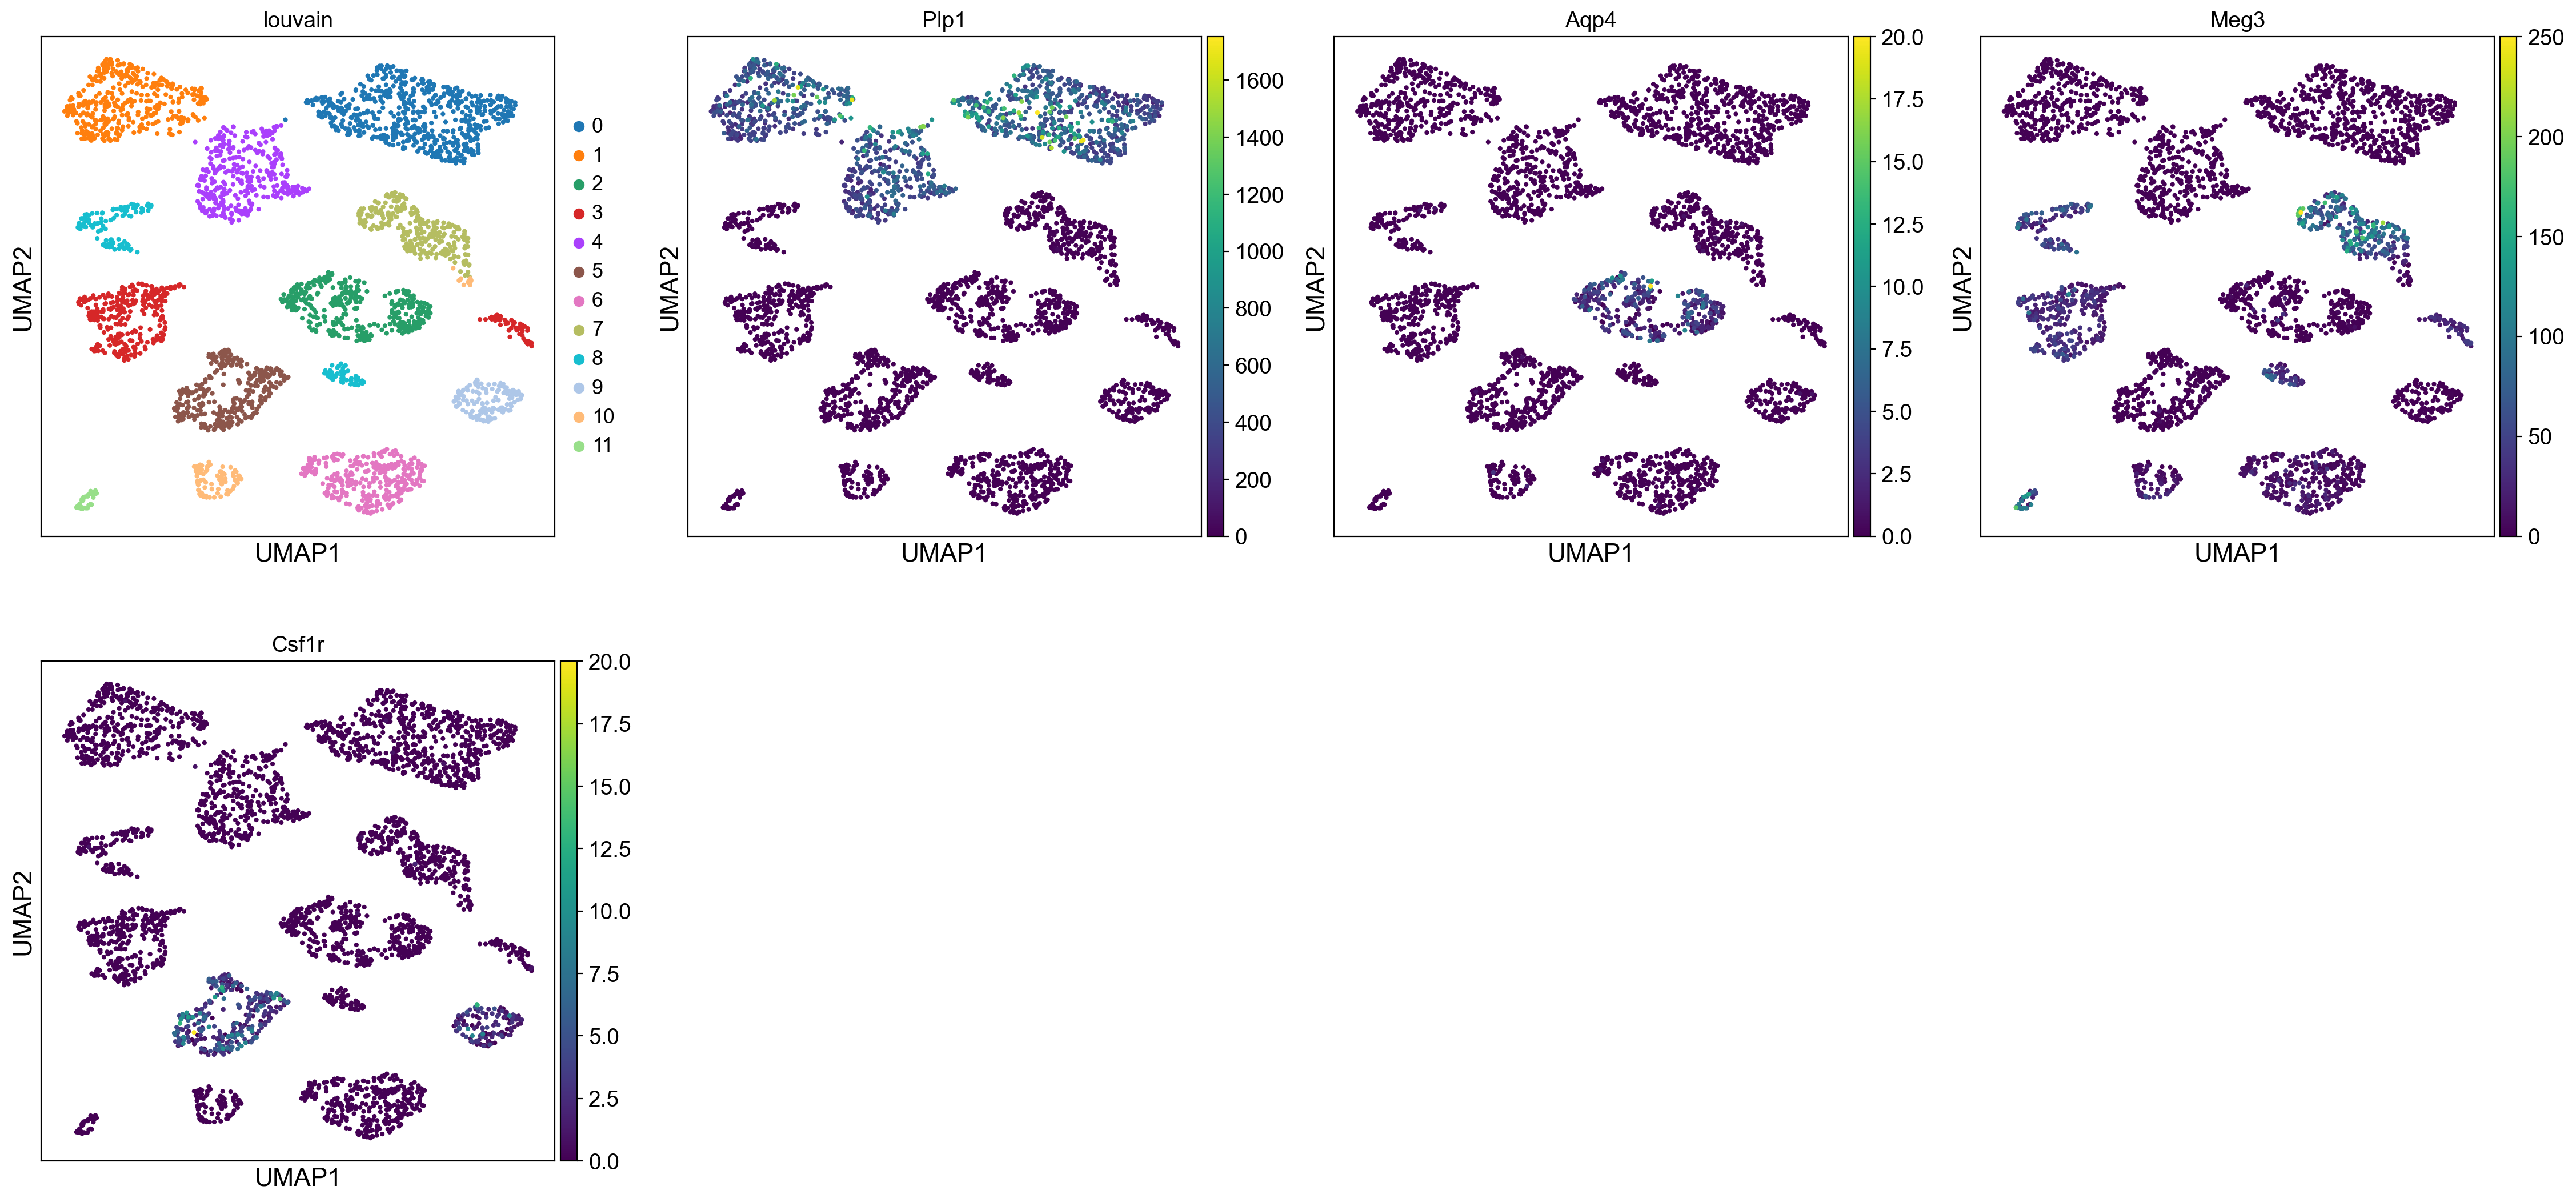

In [24]:
# your code here
sc.pl.umap(adata, color=['louvain','Plp1','Aqp4','Meg3','Csf1r'])

### **Exercise 7**:

Let’s take a few steps back to understand all of the previous steps a little bit better!

The number of genes selected by the highly_variable_genes function can significantly impact your ability to cluster. Too few genes and you cannot discriminate between different cell types, too many genes and you capture lots of noisy clusters!

Try repeating the previous analysis with either 500 or 5000 highly variable genes, naming the AnnData object differently (i.e. adata_500genes) to avoid overwriting your previous results.

Transfer the metadata for the new cluster labels to the original AnnData object's metadata at adata.obs and compare on the UMAP. Are the clusters different?

In [25]:
# your code here


### **Exercise 8**:

Once you have settled on the parameters for the dimensionality reduction and clustering steps, it is time to begin annotating your clusters with cell types. This is normally a challenging step!

When you are not too familiar with the marker genes for a particular cluster, a good starting point is simply to Google a strong marker gene and understand its function. Other tools that might be useful include EnrichR and GSEAPy.
- https://maayanlab.cloud/Enrichr/
- https://gseapy.readthedocs.io/en/latest/gseapy_example.html#2.-Enrichr-Example

Fortunately in our case, this dataset comes from a publication with an extensive web browser that allows you to search for cell types by marker gene expression: http://mousebrain.org/adolescent/celltypes.html

This should help narrow down the search but might not be enough for distinguishing two very similar cell types or clusters.

Justify your cell type choices with marker genes from the literature!

### **Exercise 9**:

Create a new metadata attribute to annotate clusters with corresponding cell types. This can be done as shown below. Illustrate the final results on the UMAP or tSNE.

In [ ]:
cluster2type_dict = {"0":"CellType1", "1": "CellType2", ... } # update for the number of clusters/cell types you have!

adata.obs["cell_type"] = np.array([cluster2type_dict[i] for i in adata.obs["louvain"]])

In [ ]:
# your code here to visualize result on the tSNE

### **Exercise 10**:

There are many excellent plotting functions to visualize marker genes for particular cell types in your data. Explore the documentation below and create some visualizations of your results (such as a heatmap, dot plot, or violin plot).

https://scanpy-tutorials.readthedocs.io/en/latest/plotting/core.html


In [ ]:
sc.pl.heatmap(adata, ["Gene1", "Gene2", ..., "GeneN"], groupby='louvain',
              cmap='viridis', dendrogram=False)

In [ ]:
sc.pl.dotplot(adata, ["Gene1", "Gene2", ..., "GeneN"], groupby='louvain',
              cmap='viridis', dendrogram=False)

In [ ]:
sc.pl.violin(adata, ["Gene1", "Gene2", ..., "GeneN"], groupby='louvain',
              cmap='viridis', dendrogram=False)

## 8. Compare to the annotated results from the study

Fortunately, these data are from a completed study, so we have the annotations created by the authors for the various cell types! When you reach this step, let us know and we will provide you with the “solutions.” Load these into a new AnnData object, named ref_adata.

Once you have done this, visualize the cell types provided by the authors. Some good questions to think about investigating might be: Do the author's results overlap with the clusters and/or cell types you annotated? Did the authors overgeneralize or did you miss any clusters? How many of your cells were excluded by the authors?


In [ ]:
!wget https://figshare.com/ndownloader/files/34551920 -O ref_data.h5ad




### **Exercise 11**:

Compare your results with those from the published study. Some suggestions are below:

In [ ]:
ref_adata = sc.read_h5ad("Dataset1_Annotated.h5ad") # load reference file (only provided to your group once the prior steps are completed)

In [ ]:
# compare the number of cells in your AnnData object and the number of cells in the reference
ref_adata.n_obs, adata.n_obs

In [35]:
# The cell-type labels in the reference data are stored in the 'Class' variable of the obs. 
ref_adata.obs['Class'].head(3)#.to_dict()

10X81_1_ATTGATCAGGTTCA--10    Neurons
10X55_5_GTAGGTCAACACAC--1      Oligos
10X20_2_TGAGCTGATTTGGG-1-5     Immune
Name: Class, dtype: category
Categories (4, object): ['Astrocytes', 'Immune', 'Neurons', 'Oligos']

In [36]:
# Transfer them to your data by creating a dictionary of barcode : cell type for the reference
ref_types=ref_adata.obs['Class'].to_dict()
# Now you can add these labels to your data in a new metadata attribute "reference_cell_type"
adata.obs["reference_cell_type"]=ref_types

/Users/lgarma/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/lgarma/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


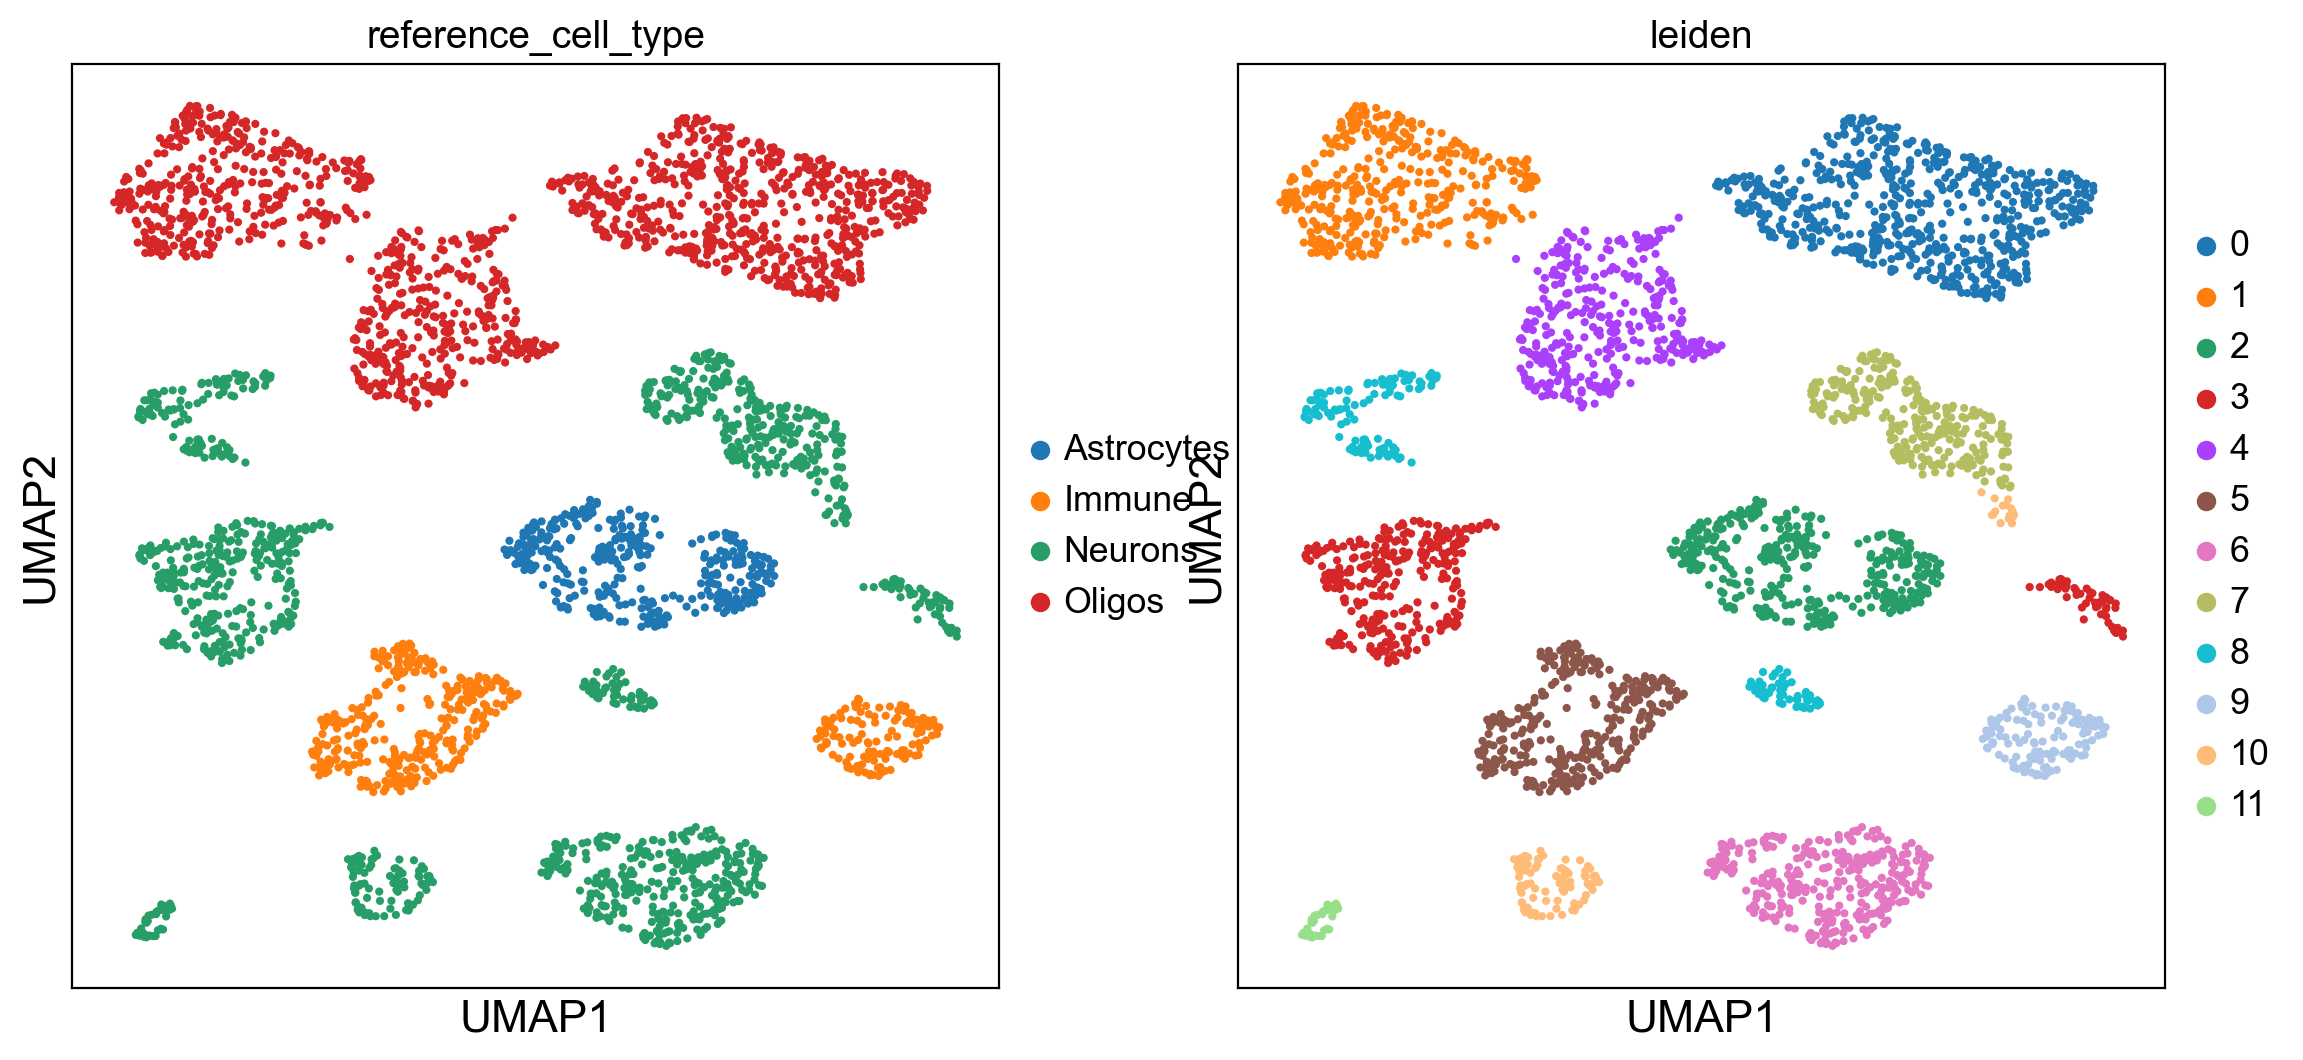

In [39]:
# Compare the reference annotations with your own
sc.pl.umap(adata, color=["reference_cell_type",'leiden'])

In [ ]:
# do your clusters / cell types correspond directly to cell types from the authors?
# do you have multiple clusters that the author's annotated together as a single cell type?
# or, do you have one cluster that the author's actually annotated as two different cell types?

In [41]:
# what are the marker genes for the author's cell types? does this assist with annotation of your clusters?
sc.tl.rank_genes_groups(adata, groupby='reference_cell_type')


ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


In [43]:
marker_genes = pd.DataFrame(adata.uns["rank_genes_groups"]["names"])

In [44]:
marker_genes.head()

Astrocytes  Immune Neurons  Oligos
0     Atp1a2    C1qa   Calm2    Plp1
1      Aldoc    C1qc    Bex2   Cryab
2    Gpr37l1   Itm2b  Mllt11     Cnp
3    Slc6a11    C1qb  Camk2b    Fth1
4        Mt1  Tyrobp    Meg3  Tubb4a

In [ ]:
# don't forget to save your final AnnData object